This notebook walks through how to access hyperspectral remote sensing reflectance (Rrs) data from NASA's PACE satellite, use that Rrs data to estimate pigment concentrations (chlorophyll a, chlorophyll b, chlorophyll c, and photoprotective carotenoids (PPC)), and then plot the pigment concentratiosn using a color map with latitude and longitude coordinates. 

You need an Earthdata account to access PACE data. You can create an account here: https://urs.earthdata.nasa.gov
See part one (Setup) and two (NASA Earthdata Authentication) on this tutorial: https://oceancolor.gsfc.nasa.gov/resources/docs/tutorials/notebooks/oci_data_access/

In [3]:
import earthaccess

In [4]:
auth = earthaccess.login(persist=True)

Next, import L3_utils. L3_utils contains methods to retrieve level 3 PACE Rrs data, apply the inversion method to estimate pigment concentrations, and then plot the pigments. 

In [5]:
import L3_utils

In [6]:
# download Rrs, salinity, and temp data from 2024-06-12 to 2024-06-15 at 4km resolution
rrs_paths, sal_paths, temp_paths = L3_utils.load_data(('2024-06-12','2024-06-15'), '4km')

Granules found: 4
 Getting 4 granules, approx download size: 2.66 GB


QUEUEING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

File PACE_OCI.20240612.L3m.DAY.RRS.V2_0.Rrs.4km.NRT.nc already downloaded
File PACE_OCI.20240613.L3m.DAY.RRS.V2_0.Rrs.4km.NRT.nc already downloaded
File PACE_OCI.20240614.L3m.DAY.RRS.V2_0.Rrs.4km.NRT.nc already downloaded
File PACE_OCI.20240615.L3m.DAY.RRS.V2_0.Rrs.4km.NRT.nc already downloaded


PROCESSING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/4 [00:00<?, ?it/s]

Granules found: 11
 Getting 11 granules, approx download size: 0.11 GB


QUEUEING TASKS | :   0%|          | 0/11 [00:00<?, ?it/s]

File SMAP_L3_SSS_20240608_8DAYS_V5.0.nc already downloaded
File SMAP_L3_SSS_20240609_8DAYS_V5.0.nc already downloaded
File SMAP_L3_SSS_20240611_8DAYS_V5.0.nc already downloaded
File SMAP_L3_SSS_20240612_8DAYS_V5.0.nc already downloaded
File SMAP_L3_SSS_20240610_8DAYS_V5.0.nc already downloaded
File SMAP_L3_SSS_20240613_8DAYS_V5.0.nc already downloaded
File SMAP_L3_SSS_20240614_8DAYS_V5.0.nc already downloaded
File SMAP_L3_SSS_20240617_8DAYS_V5.0.nc already downloaded
File SMAP_L3_SSS_20240615_8DAYS_V5.0.nc already downloaded
File SMAP_L3_SSS_20240618_8DAYS_V5.0.nc already downloaded
File SMAP_L3_SSS_20240616_8DAYS_V5.0.nc already downloaded


PROCESSING TASKS | :   0%|          | 0/11 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/11 [00:00<?, ?it/s]

Granules found: 4
 Getting 4 granules, approx download size: 2.77 GB


QUEUEING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

File 20240612090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc already downloaded
File 20240613090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc already downloaded
File 20240614090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc already downloaded
File 20240615090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc already downloaded


PROCESSING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/4 [00:00<?, ?it/s]

In [7]:
rrs_paths

['rrs_data/PACE_OCI.20240612.L3m.DAY.RRS.V2_0.Rrs.4km.NRT.nc',
 'rrs_data/PACE_OCI.20240613.L3m.DAY.RRS.V2_0.Rrs.4km.NRT.nc',
 'rrs_data/PACE_OCI.20240614.L3m.DAY.RRS.V2_0.Rrs.4km.NRT.nc',
 'rrs_data/PACE_OCI.20240615.L3m.DAY.RRS.V2_0.Rrs.4km.NRT.nc']

In [8]:
# salinity data files are kept as 8 day averages, so some files are dated before/after the date range and are downloaded as well
sal_paths

['sal_data/SMAP_L3_SSS_20240608_8DAYS_V5.0.nc',
 'sal_data/SMAP_L3_SSS_20240609_8DAYS_V5.0.nc',
 'sal_data/SMAP_L3_SSS_20240610_8DAYS_V5.0.nc',
 'sal_data/SMAP_L3_SSS_20240611_8DAYS_V5.0.nc',
 'sal_data/SMAP_L3_SSS_20240612_8DAYS_V5.0.nc',
 'sal_data/SMAP_L3_SSS_20240613_8DAYS_V5.0.nc',
 'sal_data/SMAP_L3_SSS_20240614_8DAYS_V5.0.nc',
 'sal_data/SMAP_L3_SSS_20240615_8DAYS_V5.0.nc',
 'sal_data/SMAP_L3_SSS_20240616_8DAYS_V5.0.nc',
 'sal_data/SMAP_L3_SSS_20240617_8DAYS_V5.0.nc',
 'sal_data/SMAP_L3_SSS_20240618_8DAYS_V5.0.nc']

In [9]:
temp_paths

['temp_data/20240612090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
 'temp_data/20240613090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
 'temp_data/20240614090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
 'temp_data/20240615090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc']

After downloading the files you can pass in the files along with a bounding box into the estimate_inv_pigments method to run the inversion algorithm. The bounding box is a tuple of 4 ints/floats of the form (lower_left_lon, lower_left_lat, upper_left_lon, upper_left_lat) that represents the area you want to estimate pigments for. You can either pass in a single file path as a string to estimate pigment concentrations for that specific day, or you can pass in the list of file paths to get a date averaged estimation of pigment concentrations. 
This method will return an xarray dataset with pigment values for chla, chlb, chlc, and ppc. This calculates the pigment values for each coordinate in the dataset. Calculating the pigments can take a long time; the number of pixels calculated and the total number of pixels is displayed.

In [10]:
rrs_paths[0]

'rrs_data/PACE_OCI.20240612.L3m.DAY.RRS.V2_0.Rrs.4km.NRT.nc'

In [11]:
sal_paths[4]

'sal_data/SMAP_L3_SSS_20240612_8DAYS_V5.0.nc'

In [12]:
temp_paths[0]

'temp_data/20240612090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc'

In [13]:
# This calculates pigments using Rrs, salinity, and temperature on 2024-06-12 from 49N to 47N, and -125W to -124W, an area
# off the coast of Washington. 
bbox = (-125, 47, -124, 49)
pigments = L3_utils.estimate_inv_pigments(rrs_paths[0], sal_paths[4], temp_paths[0], bbox)
pigments

num pixels:  1152
Progress: 1152/1152

<xarray.Dataset> Size: 37kB
Dimensions:  (lat: 48, lon: 24)
Coordinates:
  * lat      (lat) float32 192B 48.98 48.94 48.9 48.85 ... 47.1 47.06 47.02
  * lon      (lon) float32 96B -125.0 -124.9 -124.9 ... -124.1 -124.1 -124.0
Data variables:
    chla     (lat, lon) float64 9kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    chlb     (lat, lon) float64 9kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    chlc     (lat, lon) float64 9kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    ppc      (lat, lon) float64 9kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

After the pigments have downloaded, it is a good idea to save the pigment dataset to an nc file so you don't have to compute the pigment values again. 

In [14]:
import xarray
pigments.to_netcdf('pigments/wash_coast')

You can open the data file again when you need it

In [15]:
pigments = xarray.open_dataset('pigments/wash_coast')
pigments

<xarray.Dataset> Size: 37kB
Dimensions:  (lat: 48, lon: 24)
Coordinates:
  * lat      (lat) float32 192B 48.98 48.94 48.9 48.85 ... 47.1 47.06 47.02
  * lon      (lon) float32 96B -125.0 -124.9 -124.9 ... -124.1 -124.1 -124.0
Data variables:
    chla     (lat, lon) float64 9kB ...
    chlb     (lat, lon) float64 9kB ...
    chlc     (lat, lon) float64 9kB ...
    ppc      (lat, lon) float64 9kB ...

Now use plot_pigments method to plot a map of pigment values. Pigment values are in units of mg/m^3. 

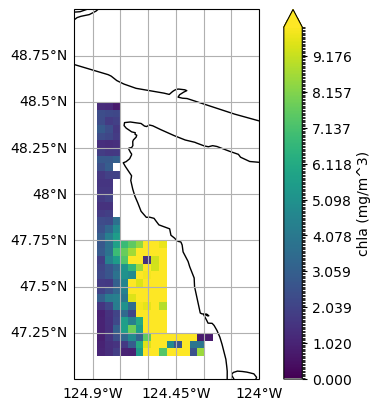

In [17]:
# This plots the concentration of chlorophyll a on a color map. The color bar is set to show values from 0 to 10 with a label
# 'chla (mg/m^3)'
chla = pigments['chla']
L3_utils.plot_pigments(pigments['chla'], 0, 10, 'chla (mg/m^3)')

In [18]:
#Use average Rrs, salinity, and temperature values from 2024-06-12 to 2024-06-15 to estimate pigments for the same area as above.
bbox = (-125, 47, -124, 49)
avg_pigments = L3_utils.estimate_inv_pigments(rrs_paths, sal_paths, temp_paths, bbox)
avg_pigments.to_netcdf('pigments/wash_coast_avg')
avg_pigments

num pixels:  1152
Progress: 1152/1152

<xarray.Dataset> Size: 37kB
Dimensions:  (lat: 48, lon: 24)
Coordinates:
  * lat      (lat) float32 192B 48.98 48.94 48.9 48.85 ... 47.1 47.06 47.02
  * lon      (lon) float32 96B -125.0 -124.9 -124.9 ... -124.1 -124.1 -124.0
Data variables:
    chla     (lat, lon) float64 9kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    chlb     (lat, lon) float64 9kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    chlc     (lat, lon) float64 9kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    ppc      (lat, lon) float64 9kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

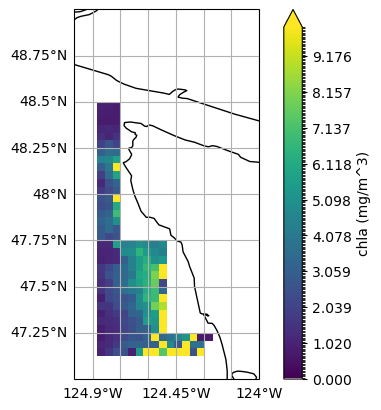

In [28]:
# Notice the difference in this plot of a 4 day average compared to the plot of a single day. 
chla = avg_pigments['chla']
L3_utils.plot_pigments(avg_chla, 0, 10, 'chla (mg/m^3)')

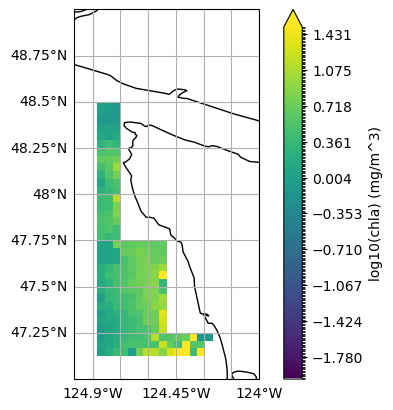

In [29]:
# plot chlorophyll a on a log 10 scale to emphasize variation. Note how the scale of the color bar is now -2 to 1.5
import numpy as np
log_chla = np.log10(chla)
L3_utils.plot_pigments(log_chla, -2, 1.5, 'log10(chla) (mg/m^3)')

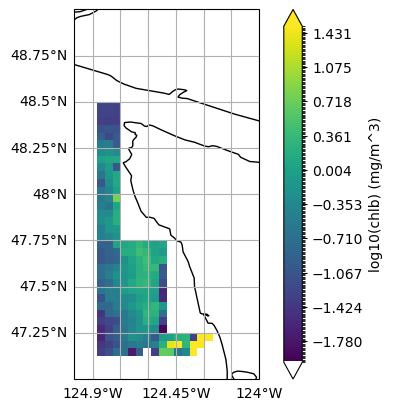

In [30]:
# plot chlorophyll b on a log 10 scale
chlb = avg_pigments['chlb']
log_chlb = np.log10(chlb)
L3_utils.plot_pigments(log_chlb, -2, 1.5, 'log10(chlb) (mg/m^3)')

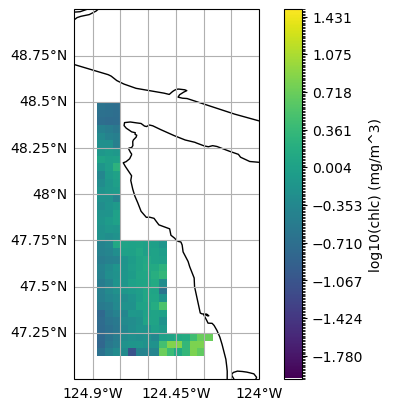

In [31]:
# plot chlorophyll c on a log 10 scale
chlc = avg_pigments['chlc']
log_chlc = np.log10(chlc)
L3_utils.plot_pigments(log_chlc, -2, 1.5, 'log10(chlc) (mg/m^3)')

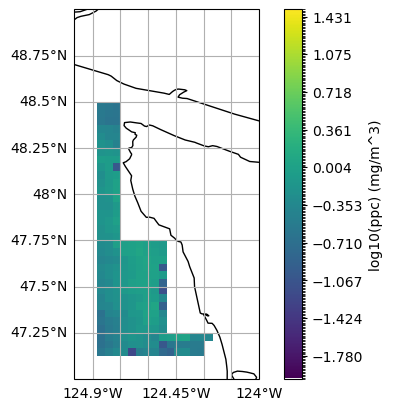

In [32]:
# plot PPC on a log 10 scale
ppc = avg_pigments['ppc']
log_ppc = np.log10(ppc)
L3_utils.plot_pigments(log_ppc, -2, 1.5, 'log10(ppc) (mg/m^3)')

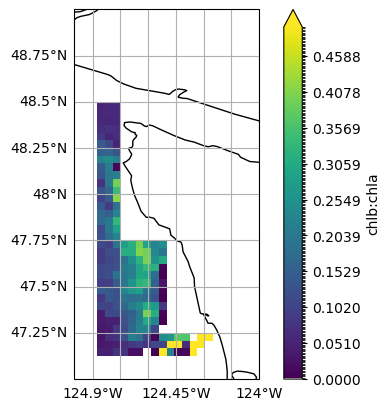

In [33]:
# plot the ratio between chlb and chla
ba_ratio = chlb/avg_chla
L3_utils.plot_pigments(ba_ratio, 0, 0.5, 'chlb:chla')

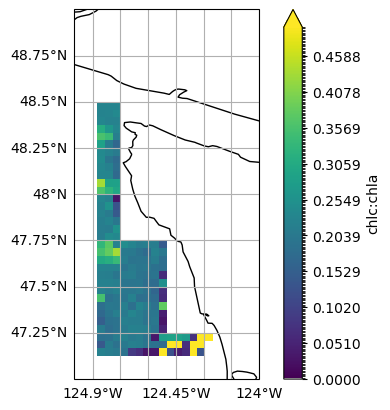

In [34]:
# plot the ratio between chlc and chla
ca_ratio = chlc/chla
L3_utils.plot_pigments(ca_ratio, 0, 0.5, 'chlc:chla')

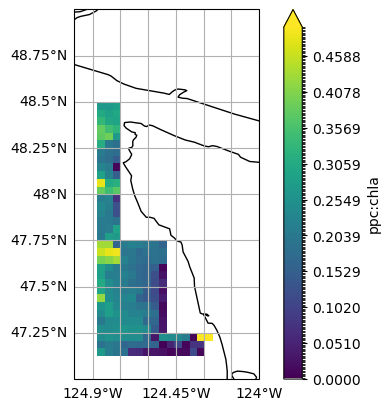

In [35]:
# plot the ratio between ppc and chla
pa_ratio = ppc/chla
L3_utils.plot_pigments(pa_ratio, 0, 0.5, 'ppc:chla')